In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_parquet('spotify_songs.parquet')

In [ ]:
# Assume df is your DataFrame containing the Spotify dataset

# Handling missing values
df.dropna(inplace=True)

# Converting 'track_popularity' to categorical labels
def classify_popularity(popularity):
    if popularity <= 20:
        return 0
    elif popularity <= 40:
        return 1
    elif popularity <= 60:
        return 2
    else:
        return 3

df['popularity_class'] = df['track_popularity']

In [ ]:
df

,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity_class
track_id,,,,,,,,,,,,,,,,,,,,,
6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,66
0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,67
1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,70
75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093,60
1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,...,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,42
5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,...,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,20
7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,...,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,14


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

df.drop(columns = ['track_name', 'track_artist', 'track_album_id', 'track_album_name', 'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre'], inplace = True)


# Scaling numerical columns
numerical_columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


# Convert 'track_album_release_date' to datetime
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'])

# Extract year, month, day information
df['release_year'] = df['track_album_release_date'].dt.year

filtered_df = df[df['release_year'] >= 2019]
# Drop the original 'track_album_release_date' column
filtered_df.drop(columns=['track_album_release_date', 'release_year','track_popularity'], inplace=True)

<ipython-input-7-af6d869e1cae>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(columns=['track_album_release_date', 'release_year','track_popularity'], inplace=True)


In [ ]:
print(df)

                        track_popularity track_album_release_date  \
track_id                                                            
6f807x0ima9a1j3VPbc7VN                66               2019-06-14   
0r7CVbZTWZgbTCYdfa2P31                67               2019-12-13   
1z1Hg7Vb0AhHDiEmnDE79l                70               2019-07-05   
75FpbthrwQmzHlBJLuGdC7                60               2019-07-19   
1e8PAfcKUYoKkxPhrHqw4x                69               2019-03-05   
...                                  ...                      ...   
7bxnKAamR3snQ1VGLuVfC1                42               2014-04-28   
5Aevni09Em4575077nkWHz                20               2013-03-08   
7ImMqPP3Q1yfUHvsdn7wEo                14               2014-04-21   
2m69mhnfQ1Oq6lGtXuYhgX                15               2014-01-01   
29zWqhca3zt5NsckZqDf6c                27               2014-03-03   

                        danceability    energy       key  loudness      mode  \
track_id              

SVR

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
# separando quem é feature e quem é target
X = filtered_df.drop(columns=['popularity_class'])
y = filtered_df['popularity_class']

# Splitting dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Original dataset shape", Counter(y_train))

sm = RandomUnderSampler(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print("Dataset shape undersampling", Counter(y_res))

Original dataset shape Counter({50: 163, 40: 156, 38: 151, 39: 151, 43: 150, 45: 149, 57: 144, 56: 142, 48: 142, 42: 141, 37: 141, 62: 139, 51: 139, 35: 138, 49: 138, 47: 137, 52: 136, 44: 136, 54: 133, 36: 133, 67: 129, 34: 127, 61: 123, 41: 123, 55: 123, 53: 123, 59: 122, 33: 121, 63: 119, 60: 118, 46: 114, 66: 114, 64: 109, 69: 108, 58: 105, 65: 103, 71: 103, 68: 99, 70: 97, 32: 95, 79: 94, 29: 91, 75: 90, 31: 89, 30: 88, 74: 85, 72: 84, 76: 82, 83: 78, 88: 75, 73: 71, 27: 67, 77: 67, 24: 66, 26: 65, 23: 65, 21: 64, 85: 63, 25: 60, 28: 59, 87: 59, 78: 58, 84: 56, 80: 53, 18: 53, 82: 52, 86: 50, 81: 49, 19: 47, 91: 46, 90: 46, 20: 45, 22: 41, 17: 40, 16: 36, 14: 35, 15: 32, 6: 31, 9: 30, 0: 28, 13: 28, 93: 27, 94: 26, 98: 24, 10: 23, 1: 23, 11: 23, 7: 21, 89: 20, 12: 20, 8: 19, 2: 19, 92: 17, 3: 15, 97: 14, 5: 14, 95: 14, 4: 10, 96: 6, 99: 3, 100: 2})
Dataset shape undersampling Counter({0: 2, 1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15

In [ ]:
filtered_df.to_csv('filtered_df.csv', index=False)

In [ ]:
# SVM - TESTAR MAIS HIPERPARAMETROS
svm_model = SVR(kernel='linear')  # You can try different kernels and hyperparameters

# Treinando modelo
svm_model.fit(X_res, y_res)

# Predict
predictions = svm_model.predict(X_test)

# Avaliando
print("MAE:", mean_absolute_error(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))
print("R2:", r2_score(y_test, predictions))

MAE: 17.10654634439024
MSE: 456.39451466120687
R2: -0.06435260976394841


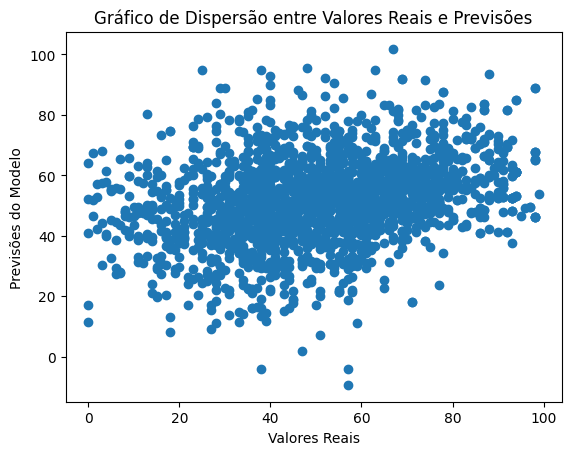

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel("Valores Reais")
plt.ylabel("Previsões do Modelo")
plt.title("Gráfico de Dispersão entre Valores Reais e Previsões")
plt.show()

In [ ]:
# SVM - TESTAR MAIS HIPERPARAMETROS
svm_model_sem_under = SVR(kernel='linear')  # You can try different kernels and hyperparameters

# Treinando modelo
svm_model_sem_under.fit(X_train, y_train)

# Predict
predictions_sem_under = svm_model_sem_under.predict(X_test)

# Avaliando
print("MAE:", mean_absolute_error(y_test, predictions_sem_under))
print("MSE:", mean_squared_error(y_test, predictions_sem_under))
print("R2:", r2_score(y_test, predictions_sem_under))

MAE: 15.403931640986295
MSE: 364.0064529571209
R2: 0.15110456911729198


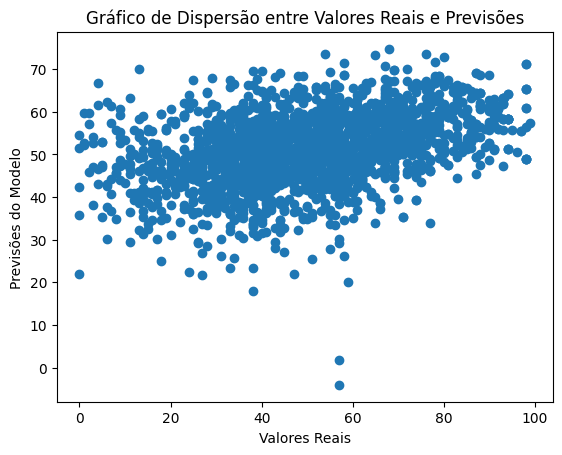

In [ ]:
plt.scatter(y_test, predictions_sem_under)
plt.xlabel("Valores Reais")
plt.ylabel("Previsões do Modelo")
plt.title("Gráfico de Dispersão entre Valores Reais e Previsões")
plt.show()

In [ ]:
# Aplicando Random Search

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [ ]:
# SVM - TESTAR MAIS HIPERPARAMETROS
svm = SVR()  # You can try different kernels and hyperparameters

# Definindo os hiperparâmetros que você deseja otimizar
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'epsilon': [0.1, 0.2, 0.5],
}

splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_svr = GridSearchCV(estimator=svm,
                        param_grid=param_grid,
                        scoring= "neg_mean_squared_error",
                        cv= splitter,
                        verbose=10,
                        n_jobs=-1
)

grid_svr.fit(X_train, y_train)

# Predict
predictions = grid_svr.predict(X_test)

# Avaliando
print("MAE:", mean_absolute_error(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))
print("R2:", r2_score(y_test, predictions))

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


MAE: 14.347454911289645
MSE: 329.72069863336236
R2: 0.23106199831493912


In [ ]:
grid_svr.best_params_

{'C': 10, 'epsilon': 0.5, 'kernel': 'rbf'}

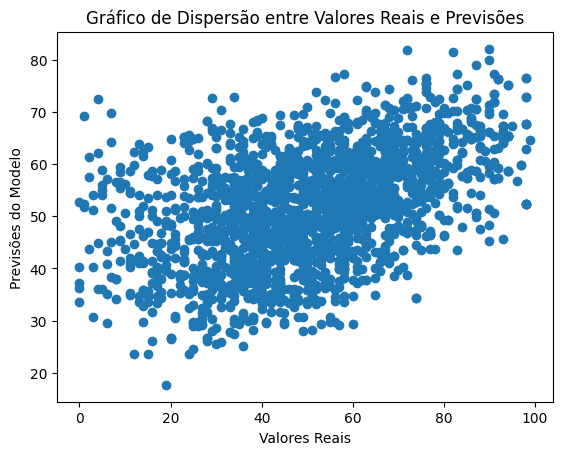

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel("Valores Reais")
plt.ylabel("Previsões do Modelo")
plt.title("Gráfico de Dispersão entre Valores Reais e Previsões")
plt.show()

In [ ]:
# Usando parquet novo

In [ ]:
df = pd.read_parquet('versao_2_spotify_songs.parquet')

In [ ]:
df.head()

,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity_class
track_popularity,,,,,,,,,,,,,,,
7,pop,electropop,0.665,0.600,11,-7.396,0,0.0344,0.0103,0.455000,0.0928,0.595,102.002,247920,0
48,rap,trap,0.620,0.590,5,-8.289,0,0.0497,0.3420,0.000000,0.0958,0.270,160.026,192000,2
2,rap,trap,0.703,0.376,6,-17.772,0,0.0752,0.2780,0.000000,0.0540,0.650,140.015,213618,0
4,rap,hip hop,0.583,0.527,11,-7.876,1,0.0733,0.7150,0.000007,0.1540,0.395,97.346,187036,0
0,rap,trap,0.594,0.393,5,-10.027,0,0.0809,0.2220,0.000002,0.0941,0.425,106.821,303073,0


In [ ]:
df = pd.get_dummies(df, columns=['playlist_genre', 'playlist_subgenre'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
# separando quem é feature e quem é target
X = df.drop(columns=['popularity_class'])
y = df['popularity_class']

# Splitting dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Original dataset shape", Counter(y_train))

sm = RandomUnderSampler(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print("Dataset shape undersampling", Counter(y_res))

Original dataset shape Counter({2: 2676, 3: 2643, 1: 1978, 0: 594})
Dataset shape undersampling Counter({0: 594, 1: 594, 2: 594, 3: 594})


In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [ ]:
# SVM - TESTAR MAIS HIPERPARAMETROS
svm = SVR()  # You can try different kernels and hyperparameters

# Definindo os hiperparâmetros que você deseja otimizar
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'epsilon': [0.1, 0.2, 0.5],
}

splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_svr = GridSearchCV(estimator=svm,
                        param_grid=param_grid,
                        scoring= "neg_mean_squared_error",
                        cv= splitter,
                        verbose=10,
                        n_jobs=-1
)

grid_svr.fit(X_train, y_train)

# Predict
predictions = grid_svr.predict(X_test)

# Avaliando
print("MAE:", mean_absolute_error(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))
print("R2:", r2_score(y_test, predictions))

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [ ]:
grid_svr.best_params_

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel("Valores Reais")
plt.ylabel("Previsões do Modelo")
plt.title("Gráfico de Dispersão entre Valores Reais e Previsões")
plt.show()